In [1]:
%matplotlib inline

In [3]:
from gmprocess.io.geonet.core import read_geonet
from gmprocess.stream import streams_to_dataframe
from gmprocess.metrics.oscillators import get_spectral
import os.path
import glob
import warnings

Missing config file /Users/mhearne/.gmprocess/config.yml, setting config to default config.


# API Tutorial
What follows is a brief introduction to the methods found in the gmprocess API. This code was designed mostly to serve the purposes of the ShakeMap http://usgs.github.io/shakemap/ software, but the reader functions for the various strong motion data formats might be used in a broader context. 

Each io package (gmprocess.io.FORMAT) has a module called core.py, in which are implemented two methods: is_FORMAT and read_FORMAT. These functions all behave the same, so we'll use the geonet format as an example, since the data are readily available on the GNS FTP site (<ftp://ftp.geonet.org.nz/strong/processed/Proc/>).

In [4]:
datafile = os.path.join(os.getcwd(),'..','tests','data','geonet','20161113_110259_WTMC_20.V1A')
stream = read_geonet(datafile)

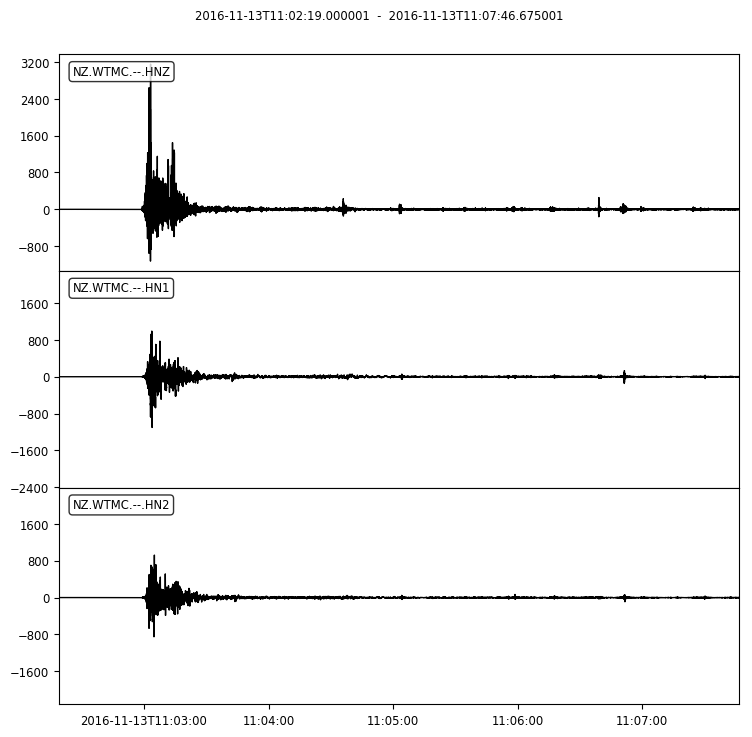

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore") #matplotlib warning is distracting
    stream.plot()

Each read_FORMAT function takes in a file name, and returns an ObsPy Stream (<https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.html>) object.  A Stream object can contain many Trace objects (<https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.html>).  Our Stream objects generally contain three Traces, one for each channel.  The channels will be named either 'H1'/'H2'/'HZ' or 'HHE'/'HHN'/'HHZ'. The Trace objects are accessed by accessing the elements of the Stream object, like so:

In [6]:
HHZ = stream[0]
HHN = stream[1]
HHE = stream[2]

Trace and Stream objects have a number of useful methods, like plot() above. See the links above for the full list.

*gmprocess* also has a method to calculate pseudo-spectral accelerations, called *get_spectral()* 

In [14]:
spectral_03 = get_spectral(0.3, stream)
spectral_10 = get_spectral(1.0, stream)
spectral_30 = get_spectral(3.0, stream)
psa_03 = spectral_03[2]
psa_10 = spectral_10[2]
psa_30 = spectral_30[2]

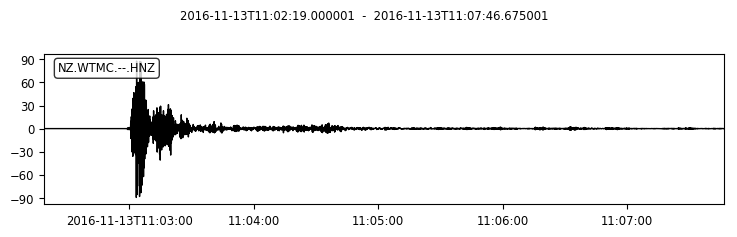

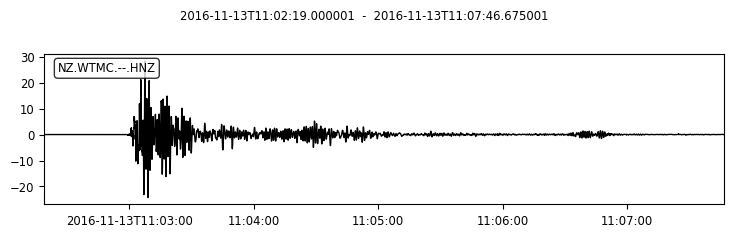

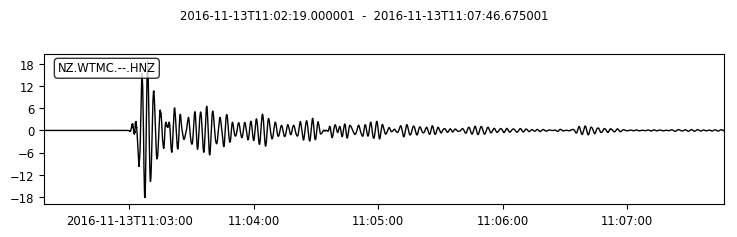

In [15]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore") #matplotlib warning is distracting
    psa_03.plot()
    psa_10.plot()
    psa_30.plot()

Finally, a method that may be of general interest is *streams_to_dataframe()*, which takes a sequence of Stream objects and turns them into a pandas DataFrame object.

In [25]:
streams = []
directory = os.path.join(os.getcwd(),'..','tests','data','geonet')
lat = -42.737
lon = 173.054
imts = ['PGA', 'PGV', 'SA(0.3)', 'SA(1.0)', 'SA(3.0)']
imcs = ['GREATER_OF_TWO_HORIZONTALS', 'CHANNELS']
dataframe = streams_to_dataframe(directory, imcs=imcs, imts=imts)

Below we'll display just the peak horizontal values.  All acceleration values are in %g, and pgv is in cm/s.

In [32]:
dataframe['GREATER_OF_TWO_HORIZONTALS']

,PGA,PGV,SA(0.3),SA(1.0),SA(3.0)
0,26.353546,33.245562,92.126294,42.135839,12.635653
1,26.040493,29.805175,89.241220,42.092867,12.561669
2,112.433910,132.658787,324.531812,135.356633,17.333431
3,99.249999,100.805156,320.352281,136.250412,17.947430
4,4.941545,12.764456,10.813448,8.428257,3.338927
5,4.764114,7.204600,10.084952,8.391367,3.385724
6,1.978249,0.482898,1.457669,0.116431,0.018137
